In [8]:
import os
import pandas as pd


database = 'w3a'
#informatión para el dibujo teórico
n , dimension = (4912, 300) 


path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/decomposition-measurement-ii/'
results_directory = path + f'results/{database}/'  # Replace this with the path to your directory
analysis_files = path + f'analysis/{database}'
plot_path = f'{analysis_files}/'
tables_path = f'{analysis_files}/latex-tables/'

## columns names 
n_components_column_name = 'n-components'
total_training_time_mean_column = 'transform-and-training-time-mean'
total_training_time_std_column = 'transform-and-training-time-std'
# relevant column names 
transform_time_mean_column = 'transform-time-mean'
transform_time_std_column = 'transform-time-std'
training_time_mean_column = 'training-time-mean'
training_time_std_column = 'training-time-std'


# Get a list of all files in the directory
files = [file for file in os.listdir(results_directory) if os.path.isfile(os.path.join(results_directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
stats_files = [file for file in files if "stats" in file]
stats_files.sort() # kernel methods será el primero

kernel_files = [file for file in stats_files if ('kernel' in file and 'kernel-linear' not in file)]
random_features_files = [file for file in stats_files if file not in kernel_files]


# Create a DataFrame for random_features files
random_features_data = pd.DataFrame()
random_features_list = []
random_features_list_names = []
random_features_data_verbose = pd.DataFrame()
for file in random_features_files:
    # mean
    file_path = os.path.join(results_directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    data['File'] = file  # Add a column to identify the file 
    # 
    data[total_training_time_mean_column] = data[transform_time_mean_column] + data[training_time_mean_column]
    data[total_training_time_std_column] = data[transform_time_std_column] + data[training_time_std_column]

    random_features_data = pd.concat([random_features_data, data], ignore_index=True)
    random_features_list.append(data)
    random_features_list_names.append(file.replace('-stats.csv', ''))


kernel_data = pd.DataFrame()
kernel_data_verbose = pd.DataFrame()
kernel_list = []
kernel_list_names = []
for file in kernel_files:
    file_path = os.path.join(results_directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed

    data['File'] = file  # Add a column to identify the file
    data.rename(columns={'score-in-test-mean': 'score-mean', 'score-in-test-std': 'score-std'}, inplace=True)
    data[total_training_time_mean_column] = data[training_time_mean_column]
    data[total_training_time_std_column] = data[training_time_std_column]

    kernel_data = pd.concat([kernel_data, data], ignore_index=True)
    kernel_list.append(data)
    kernel_list_names.append(file.replace('-stats.csv', ''))

print('Ridge files')
print(kernel_list_names)
print('kernel files')
print(kernel_list_names)
kernel_data



['results.dict', 'RFF-SVC-kernel-linear-stats.csv', 'Nystroem-SVC-kernel-linear-stats.csv', 'Nystroem-linear-SVC-stats.csv', 'RFF-linear-SVC-stats.csv', 'kernel-SVC-verbose.csv', 'RFF-verbose.csv', 'Nystroem-verbose.csv', 'kernel-SVC-stats.csv']
Ridge files
['kernel-SVC']
kernel files
['kernel-SVC']


,training-time-mean,training-time-std,prediction-time-mean,prediction-time-std,score-mean,score-std,File,transform-and-training-time-mean,transform-and-training-time-std
0,0.240559,0.003009,2.989864,0.012136,0.970203,1.110223e-16,kernel-SVC-stats.csv,0.240559,0.003009


In [9]:
random_features_data

,n-components,fit-time-mean,fit-time-std,transform-time-mean,transform-time-std,training-time-mean,training-time-std,prediction-time-mean,prediction-time-std,score-mean,score-std,File,transform-and-training-time-mean,transform-and-training-time-std
0,246,0.237390,0.255214,0.237390,0.075999,0.199694,0.024526,1.482516,0.190033,0.970203,0.0,Nystroem-SVC-kernel-linear-stats.csv,0.437084,0.100525
1,288,0.155150,0.117346,0.155150,0.013160,0.231790,0.006317,1.724369,0.086572,0.970203,0.0,Nystroem-SVC-kernel-linear-stats.csv,0.386939,0.019477
2,330,0.159413,0.095543,0.159413,0.012747,0.266106,0.007135,2.041119,0.147090,0.970203,0.0,Nystroem-SVC-kernel-linear-stats.csv,0.425519,0.019882
3,373,0.203122,0.139281,0.203122,0.009919,0.321165,0.049480,2.263196,0.050292,0.970203,0.0,Nystroem-SVC-kernel-linear-stats.csv,0.524287,0.059399
4,415,0.294527,0.326061,0.294527,0.017043,0.338693,0.007179,2.575020,0.043225,0.970203,0.0,Nystroem-SVC-kernel-linear-stats.csv,0.633220,0.024222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1304,0.006958,0.000036,0.006958,0.008809,0.060930,0.013143,0.016463,0.000570,0.970203,0.0,RFF-linear-SVC-stats.csv,0.067888,0.021953
116,1347,0.007339,0.000379,0.007339,0.014829,0.057329,0.001483,0.017513,0.001113,0.970203,0.0,RFF-linear-SVC-stats.csv,0.064667,0.016312
117,1389,0.007413,0.000049,0.007413,0.012445,0.067721,0.008925,0.017699,0.000790,0.970203,0.0,RFF-linear-SVC-stats.csv,0.075134,0.021370
118,1431,0.007625,0.000089,0.007625,0.007606,0.067817,0.008022,0.018316,0.001355,0.970203,0.0,RFF-linear-SVC-stats.csv,0.075442,0.015628


In [10]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File", column, n_components_column_name]]
   
      return dataframe

In [11]:
# get columns to be plot
mean_columns_to_be_plot = [column for column in random_features_data.columns if 'mean' in column]
std_columns_to_be_plot = [column for column in random_features_data.columns if 'std' in column]


# Sort by score 

In [12]:
show_dataframe(random_features_data,'score-mean' , ascending=False, n_rows=10)

,File,score-mean,n-components
0,Nystroem-SVC-kernel-linear-stats.csv,0.97,246
1,Nystroem-SVC-kernel-linear-stats.csv,0.97,288
88,RFF-SVC-kernel-linear-stats.csv,0.97,1431
87,RFF-SVC-kernel-linear-stats.csv,0.97,1389
86,RFF-SVC-kernel-linear-stats.csv,0.97,1347
...,...,...,...
35,Nystroem-linear-SVC-stats.csv,0.97,457
34,Nystroem-linear-SVC-stats.csv,0.97,415
33,Nystroem-linear-SVC-stats.csv,0.97,373
32,Nystroem-linear-SVC-stats.csv,0.97,330


# Plotting 

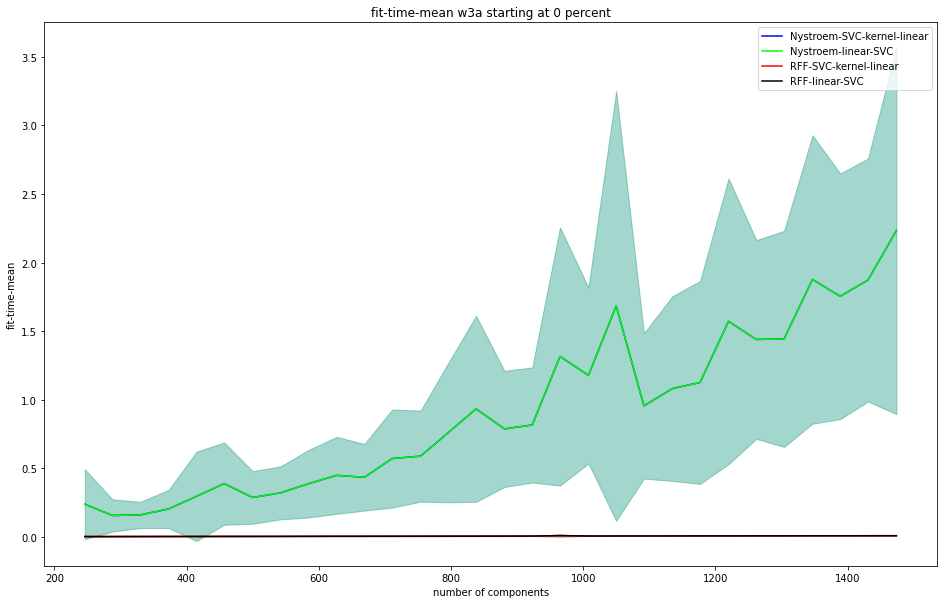

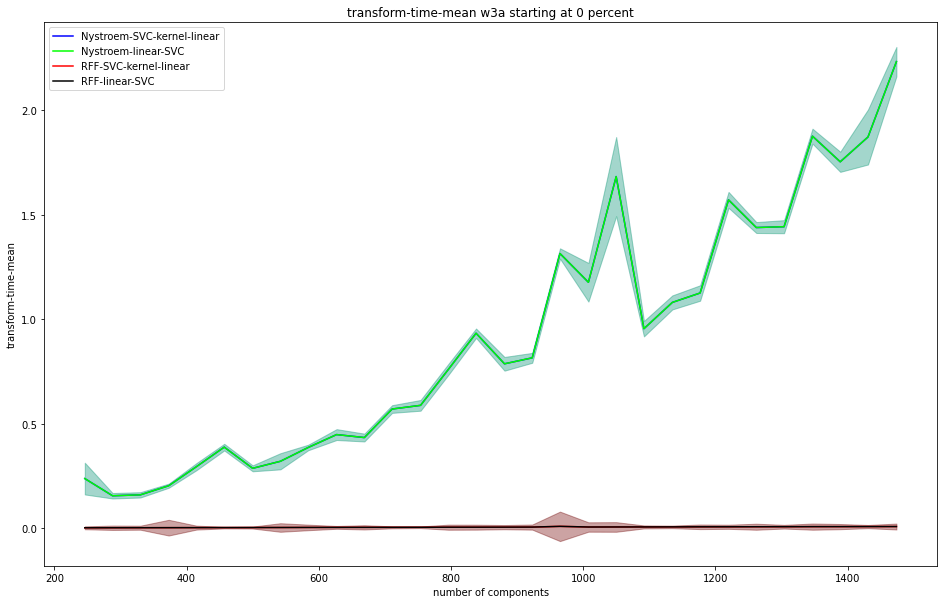

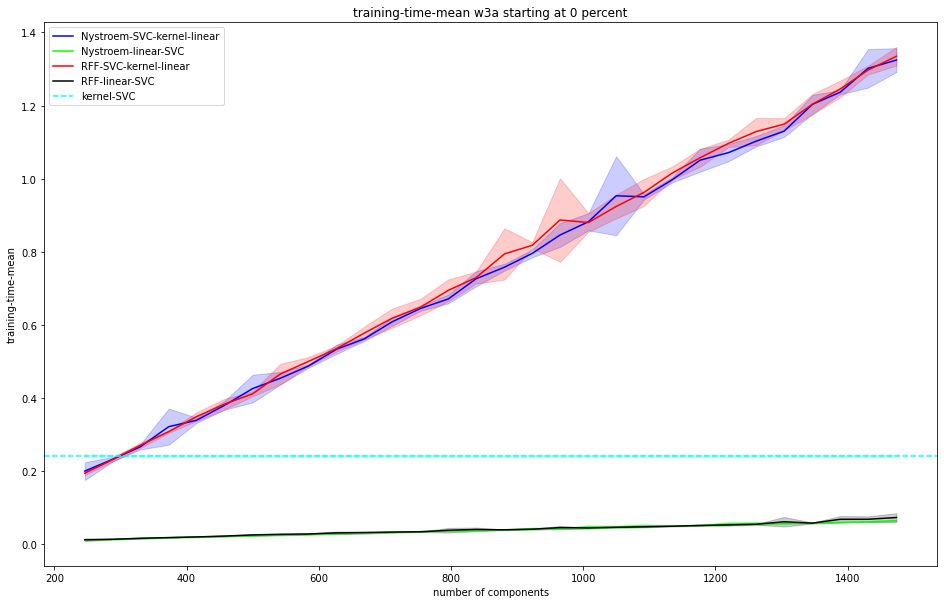

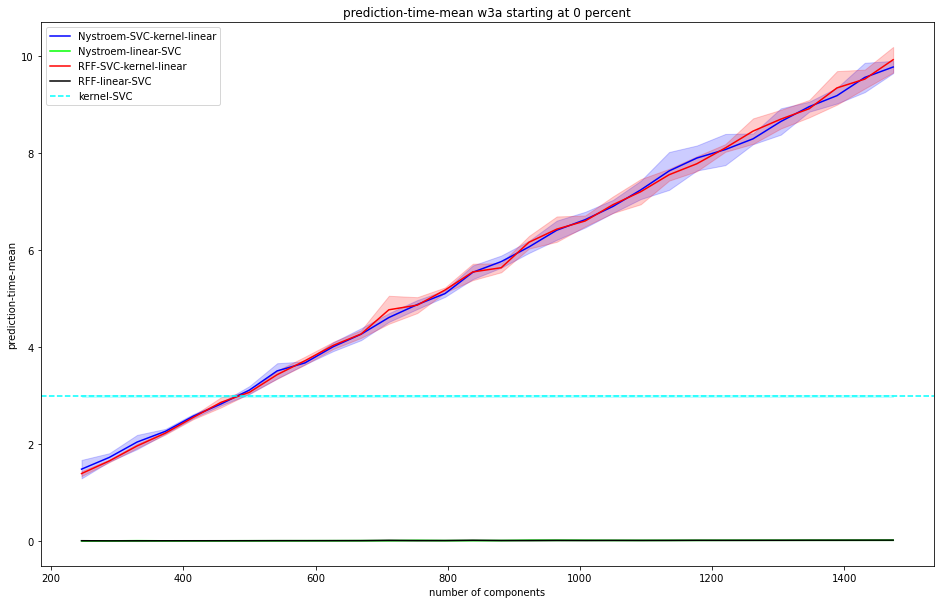

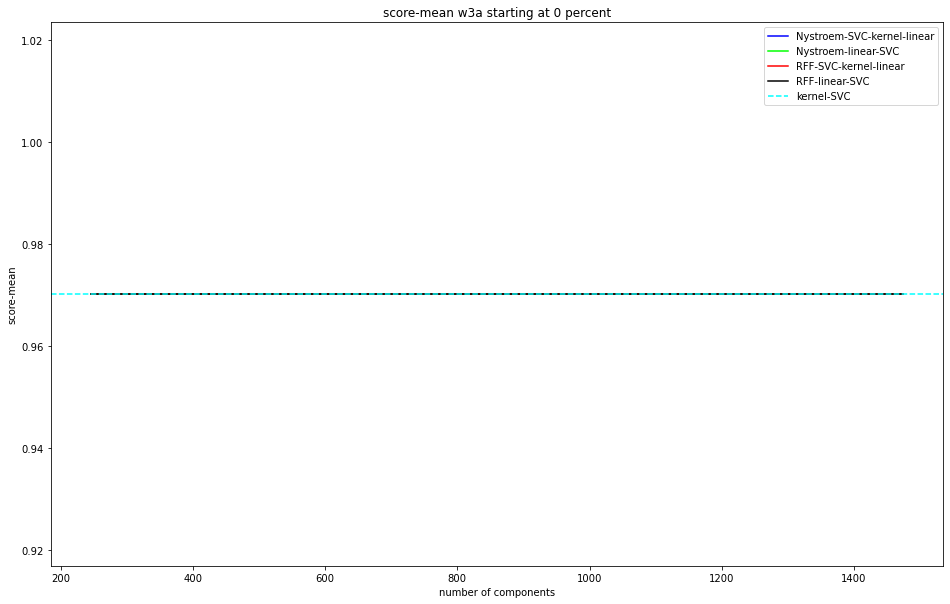

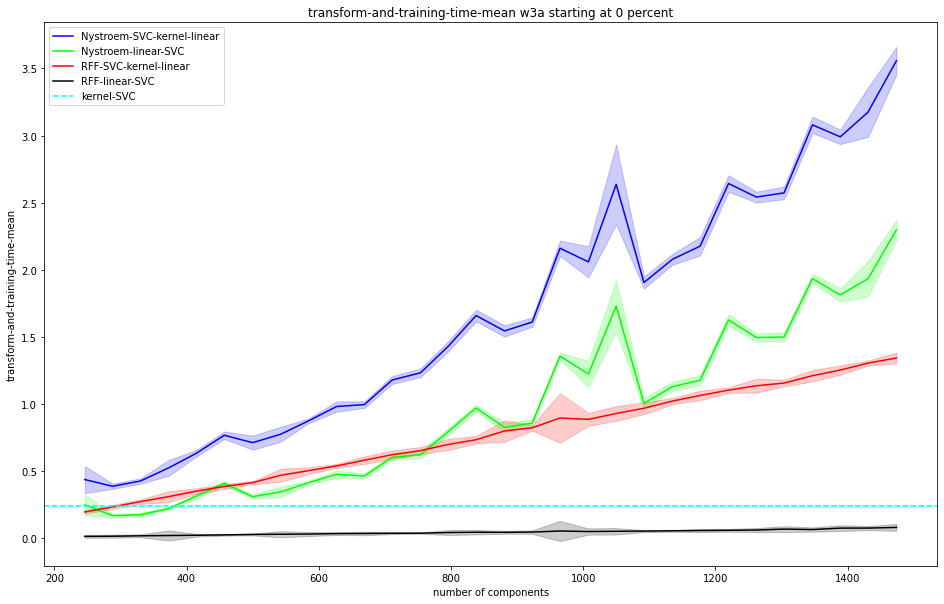

In [13]:
from plotting import view_plots_and_save_them


view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=kernel_list_names,
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')



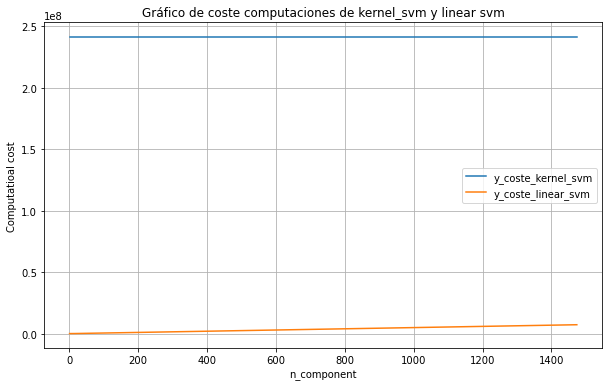

In [14]:
# Gráficos teóricos:

import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(1,n*0.3, 100)

# Definir las funciones f1(x) y f2(x)
def coste_kernel_svm(X):
    return n**2 * dimension * np.ones(len(X))

def coste_linear_svm(X):
    return n * np.array([max(x,dimension) for x in X])

print
# Especificar la dimensión
dimension = 10  # Reemplaza esto con el valor de dimensión que desees

# Calcular los valores de f1(x) y f2(x) para el rango de x
y_coste_kernel_svm = coste_kernel_svm(x)
y_coste_linear_svm = coste_linear_svm(x) 

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y_coste_kernel_svm, label='y_coste_kernel_svm')
plt.plot(x, y_coste_linear_svm, label='y_coste_linear_svm')

# Configurar el título y etiquetas de los ejes
plt.title('Gráfico de coste computaciones de kernel_svm y linear svm')
plt.xlabel('n_component')
plt.ylabel('Computatioal cost')
plt.legend()  # Mostrar las etiquetas de las funciones

# Mostrar el gráfico
plt.grid(True)
plt.show()
